In [423]:
import pandas as pd
import csv


## Concat both positive and negative tweet files

In [424]:
# Load and prepare training data
train_neg = pd.read_csv("/content/train_Arabic_tweets_negative_20190413.tsv", sep="\t", header=None, quoting=csv.QUOTE_NONE)
train_neg.rename(columns={0: 'label', 1: 'tweet'}, inplace=True)
train_neg['label'] = 0

train_pos = pd.read_csv("/content/train_Arabic_tweets_positive_20190413.tsv", sep="\t", header=None, quoting=csv.QUOTE_NONE)
train_pos.rename(columns={0: 'label', 1: 'tweet'}, inplace=True)
train_pos['label'] = 1

train_df = pd.concat([train_neg, train_pos], axis=0).reset_index(drop=True)

In [425]:
train_df

,label,tweet
0,0,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1,0,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2,0,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
3,0,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
4,0,الدودو جايه تكمل علي 💔
...,...,...
46995,1,السحب الليلة على الايفون .. رتويت للمرفقة وطبق...
46996,1,😂 لابسة احمر ليه يا ست انتي ايه المناسبة 😂
46997,1,كلاام جمييل تستاهل(من احبه الله جعل محبته ف قل...
46998,1,- ألطف صورة ممكن تعبر عن رمضان 💙


#Text Preprocessing

In [426]:
train_df.isnull().sum()

,0
label,0
tweet,0


In [427]:
train_df['cleaned_tweets']=train_df['tweet']

In [428]:

import re

def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    text = re.sub("چ", "ج", text)
    text = re.sub("پ", "ب", text)
    text = re.sub("ڜ", "ش", text)
    text = re.sub("ڪ", "ك", text)
    text = re.sub("ٱ", "ا", text)
    return text

In [429]:
train_df['cleaned_tweets'] = train_df['cleaned_tweets'].apply(normalize_arabic)

## Replace the meaningful emojis by words

In [430]:
emojis = {
    "🙂":"يبتسم",
    "😂":"يضحك",
    "💔":"قلب حزين",
    "🙂":"يبتسم",
    "❤️":"حب",
    "❤":"حب",
    "😍":"حب",
    "😭":"يبكي",
    "😢":"حزن",
    "😔":"حزن",
    "♥":"حب",
    "💜":"حب",
    "😅":"يضحك",
    "🙁":"حزين",
    "💕":"حب",
    "💙":"حب",
    "😞":"حزين",
    "😊":"سعادة",
    "👏":"يصفق",
    "👌":"احسنت",
    "😴":"ينام",
    "😀":"يضحك",
    "😌":"حزين",
    "🌹":"وردة",
    "🙈":"حب",
    "😄":"يضحك",
    "😐":"محايد",
    "✌":"منتصر",
    "✨":"نجمه",
    "🤔":"تفكير",
    "😏":"يستهزء",
    "😒":"يستهزء",
    "🙄":"ملل",
    "😕":"عصبية",
    "😃":"يضحك",
    "🌸":"وردة",
    "😓":"حزن",
    "💞":"حب",
    "💗":"حب",
    "😑":"منزعج",
    "💭":"تفكير",
    "😎":"ثقة",
    "💛":"حب",
    "😩":"حزين",
    "💪":"عضلات",
    "👍":"موافق",
    "🙏🏻":"رجاء طلب",
    "😳":"مصدوم",
    "👏🏼":"تصفيق",
    "🎶":"موسيقي",
    "🌚":"صمت",
    "💚":"حب",
    "🙏":"رجاء طلب",
    "💘":"حب",
    "🍃":"سلام",
    "☺":"يضحك",
    "🐸":"ضفدع",
    "😶":"مصدوم",
    "✌️":"مرح",
    "✋🏻":"توقف",
    "😉":"غمزة",
    "🌷":"حب",
    "🙃":"مبتسم",
    "😫":"حزين",
    "😨":"مصدوم",
    "🎼 ":"موسيقي",
    "🍁":"مرح",
    "🍂":"مرح",
    "💟":"حب",
    "😪":"حزن",
    "😆":"يضحك",
    "😣":"استياء",
    "☺️":"حب",
    "😱":"كارثة",
    "😁":"يضحك",
    "😖":"استياء",
    "🏃🏼":"يجري",
    "😡":"غضب",
    "🚶":"يسير",
    "🤕":"مرض",
    "‼️":"تعجب",
    "🕊":"طائر",
    "👌🏻":"احسنت",
    "❣":"حب",
    "🙊":"مصدوم",
    "💃":"سعادة مرح",
    "💃🏼":"سعادة مرح",
    "😜":"مرح",
    "👊":"ضربة",
    "😟":"استياء",
    "💖":"حب",
    "😥":"حزن",
    "🎻":"موسيقي",
    "✒":"يكتب",
    "🚶🏻":"يسير",
    "💎":"الماظ",
    "😷":"وباء مرض",
    "☝":"واحد",
    "🚬":"تدخين",
    "💐" : "ورد",
    "🌞" : "شمس",
    "👆" : "الاول",
    "⚠️" :"تحذير",
    "🤗" : "احتواء",
    "✖️": "غلط",
    "📍"  : "مكان",
    "👸" : "ملكه",
    "👑" : "تاج",
    "✔️" : "صح",
    "💌": "قلب",
    "😲" : "مندهش",
    "💦": "ماء",
    "🚫" : "خطا",
    "👏🏻" : "برافو",
    "🏊" :"يسبح",
    "👍🏻": "تمام",
    "⭕️" :"دائره كبيره",
    "🎷" : "ساكسفون",
    "👋": "تلويح باليد",
    "✌🏼": "علامه النصر",
    "🌝":"مبتسم",
    "➿"  : "عقده مزدوجه",
    "💪🏼" : "قوي",
    "📩":  "تواصل معي",
    "☕️": "قهوه",
    "😧" : "قلق و صدمة",
    "🗨": "رسالة",
    "❗️" :"تعجب",
    "🙆🏻": "اشاره موافقه",
    "👯" :"اخوات",
    "©" :  "رمز",
    "👵🏽" :"سيده عجوزه",
    "🐣": "كتكوت",
    "🙌": "تشجيع",
    "🙇": "شخص ينحني",
    "👐🏽":"ايدي مفتوحه",
    "👌🏽": "بالظبط",
    "⁉️" : "استنكار",
    "⚽️": "كوره",
    "🕶" :"حب",
    "🎈" :"بالون",
    "🎀":    "ورده",
    "💵":  "فلوس",
    "😋":  "جائع",
    "😛":  "يغيظ",
    "😠":  "غاضب",
    "✍🏻":  "يكتب",
    "🌾":  "ارز",
    "👣":  "اثر قدمين",
    "❌":"رفض",
    "🍟":"طعام",
    "👬":"صداقة",
    "🐰":"ارنب",
    "☂":"مطر",
    "⚜":"مملكة فرنسا",
    "🐑":"خروف",
    "🗣":"صوت مرتفع",
    "👌🏼":"احسنت",
    "☘":"مرح",
    "😮":"صدمة",
    "😦":"قلق",
    "⭕":"الحق",
    "✏️":"قلم",
    "ℹ":"معلومات",
    "🙍🏻":"رفض",
    "⚪️":"نضارة نقاء",
    "🐤":"حزن",
    "💫":"مرح",
    "💝":"حب",
    "🍔":"طعام",
    "❤︎":"حب",
    "✈️":"سفر",
    "🏃🏻‍♀️":"يسير",
    "🍳":"ذكر",
    "🎤":"مايك غناء",
    "🎾":"كره",
    "🐔":"دجاجة",
    "🙋":"سؤال",
    "📮":"بحر",
    "💉":"دواء",
    "🙏🏼":"رجاء طلب",
    "💂🏿 ":"حارس",
    "🎬":"سينما",
    "♦️":"مرح",
    "💡":"قكرة",
    "‼":"تعجب",
    "👼":"طفل",
    "🔑":"مفتاح",
    "♥️":"حب",
    "🕋":"كعبة",
    "🐓":"دجاجة",
    "💩":"معترض",
    "👽":"فضائي",
    "☔️":"مطر",
    "🍷":"عصير",
    "🌟":"نجمة",
    "☁️":"سحب",
    "👃":"معترض",
    "🌺":"مرح",
    "🔪":"سكينة",
    "♨":"سخونية",
    "👊🏼":"ضرب",
    "✏":"قلم",
    "🚶🏾‍♀️":"يسير",
    "👊":"ضربة",
    "◾️":"وقف",
    "😚":"حب",
    "🔸":"مرح",
    "👎🏻":"لا يعجبني",
    "👊🏽":"ضربة",
    "😙":"حب",
    "🎥":"تصوير",
    "👉":"جذب انتباه",
    "👏🏽":"يصفق",
    "💪🏻":"عضلات",
    "🏴":"اسود",
    "🔥":"حريق",
    "😬":"عدم الراحة",
    "👊🏿":"يضرب",
    "🌿":"ورقه شجره",
    "✋🏼":"كف ايد",
    "👐":"ايدي مفتوحه",
    "☠️":"وجه مرعب",
    "🎉":"يهنئ",
    "🔕" :"صامت",
    "😿":"وجه حزين",
    "☹️":"وجه يائس",
    "😘" :"حب",
    "😰" :"خوف و حزن",
    "🌼":"ورده",
    "💋":  "بوسه",
    "👇":"لاسفل",
    "❣️":"حب",
    "🎧":"سماعات",
    "📝":"يكتب",
    "😇":"دايخ",
    "😈":"رعب",
    "🏃":"يجري",
    "✌🏻":"علامه النصر",
    "🔫":"يضرب",
    "❗️":"تعجب",
    "👎":"غير موافق",
    "🔐":"قفل",
    "👈":"لليمين",
    "™":"رمز",
    "🚶🏽":"يتمشي",
    "😯":"متفاجأ",
    "✊":"يد مغلقه",
    "😻":"اعجاب",
    "🙉" :"قرد",
    "👧":"طفله صغيره",
    "🔴":"دائره حمراء",
    "💪🏽":"قوه",
    "💤":"ينام",
    "👀":"ينظر",
    "✍🏻":"يكتب",
    "❄️":"تلج",
    "💀":"رعب",
    "😤":"وجه عابس",
    "🖋":"قلم",
    "🎩":"كاب",
    "☕️":"قهوه",
    "😹":"ضحك",
    "💓":"حب",
    "☄️ ":"نار",
    "👻":"رعب",
    "❎":"خطء",
    "🤮":"حزن",
    '🏻':"احمر"
    }

emoticons_to_emoji = {
    ":)" : "🙂",
    ":(" : "🙁",
    "xD" : "😆",
    ":=(": "😭",
    ":'(": "😢",
    ":'‑(": "😢",
    "XD" : "😂",
    ":D" : "🙂",
    "♬" : "موسيقي",
    "♡" : "❤",
    "☻"  : "🙂",
    }

In [431]:
def replace_emojis_and_emoticons(text):
    # Replace emoticons with corresponding emojis
    for emoticon, emoji in emoticons_to_emoji.items():
        text = text.replace(emoticon, emoji)

    # Replace emojis with corresponding Arabic descriptions
    for emoji, arabic in emojis.items():
        text = text.replace(emoji, arabic)

    return text

In [432]:
train_df['cleaned_tweets'] = train_df['cleaned_tweets'].apply(replace_emojis_and_emoticons)

## Remove elongation

In [433]:
import re
def normalize_elongated_words(text):
    # Remove elongation
    text = re.sub(r'(.)\1+', r'\1\1', text)
    return text


In [434]:
train_df['cleaned_tweets'] = train_df['cleaned_tweets'].apply(normalize_elongated_words)

## Remove arabic noise like diacritics and punctuation

In [435]:
import string
import re
def remove_arabic_noise(text):
    # Remove diacritics
    text = re.sub(r'[\u0617-\u061A\u064B-\u0652]', '', text)
    # Remove el المد
    text = re.sub(r'\u0640', '', text)
    # Remove URLs
    text = re.sub('<.*?>', '', text)
    # Remove punctuation
    pattern = f"[{re.escape(string.punctuation + '؟،.%#*•~﴿,؛')}]"  # Add Arabic question mark
    text = re.sub(pattern, '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [436]:
train_df['cleaned_tweets'] = train_df['cleaned_tweets'].apply(remove_arabic_noise)

In [437]:
train_df

,label,tweet,cleaned_tweets
0,0,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1,0,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2,0,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...,الاهليالهلال اكتب توقعك لنتيجه لقاء الهلال وال...
3,0,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...,نعمه المضادات الحيويه تضع قطره💧مضاد بنسلين علي...
4,0,الدودو جايه تكمل علي 💔,الدودو جايه تكمل علي قلب حزين
...,...,...,...
46995,1,السحب الليلة على الايفون .. رتويت للمرفقة وطبق...,السحب الليله علي الايفون رتويت للمرفقه وطبق ال...
46996,1,😂 لابسة احمر ليه يا ست انتي ايه المناسبة 😂,يضحك لابسه احمر ليه يا ست انتي ايه المناسبه يضحك
46997,1,كلاام جمييل تستاهل(من احبه الله جعل محبته ف قل...,كلاام جمييل تستاهلمن احبه الله جعل محبته ف قلو...
46998,1,- ألطف صورة ممكن تعبر عن رمضان 💙,الطف صوره ممكن تعبر عن رمضان حب


In [439]:
!pip install googletrans==4.0.0-rc1

In [440]:
train_df

,label,tweet,cleaned_tweets
0,0,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1,0,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2,0,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...,الاهليالهلال اكتب توقعك لنتيجه لقاء الهلال وال...
3,0,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...,نعمه المضادات الحيويه تضع قطره💧مضاد بنسلين علي...
4,0,الدودو جايه تكمل علي 💔,الدودو جايه تكمل علي قلب حزين
...,...,...,...
46995,1,السحب الليلة على الايفون .. رتويت للمرفقة وطبق...,السحب الليله علي الايفون رتويت للمرفقه وطبق ال...
46996,1,😂 لابسة احمر ليه يا ست انتي ايه المناسبة 😂,يضحك لابسه احمر ليه يا ست انتي ايه المناسبه يضحك
46997,1,كلاام جمييل تستاهل(من احبه الله جعل محبته ف قل...,كلاام جمييل تستاهلمن احبه الله جعل محبته ف قلو...
46998,1,- ألطف صورة ممكن تعبر عن رمضان 💙,الطف صوره ممكن تعبر عن رمضان حب


## Translate the English words embedded in the tweets

In [441]:
from googletrans import Translator
import re

translator = Translator()

def starts_with_english_letter(review):
    if review is not None:  # Check if the review is not None
        cleaned_review = re.sub(r'[^\w\s]', '', review)  # Remove punctuation
        return re.match(r"^[A-Za-z]", cleaned_review) is not None
    else:
        return False  # Return False if the review is None

# Iterate over each review description in the DataFrame
for index, review in train_df['cleaned_tweets'].items():
    if starts_with_english_letter(review):
        try:
            # Translate the review to Arabic
            translated = translator.translate(review, dest='ar')
            print(f"Original: {review}")
            train_df.at[index, 'cleaned_tweets'] = translated.text
            print(f"Translated: {translated.text}")

        except Exception as e:
            # Print the error message if translation fails
            print(f"Translation failed for review: {review}. Error: {e}")
    else:
        print(f"Review does not start with an English letter: {review}")


Streaming output truncated to the last 5000 lines.
Review does not start with an English letter: صباح الخير حب
Review does not start with an English letter: لو الغلا يرسم علي حرف راعيه شفت الحروف بصفحتي تعزف الناي رسم الشعور احيان يعكس مباديه وانا علي صفحه غرامي بدا رض…
Review does not start with an English letter: صباحك مالح يضحك
Review does not start with an English letter: اسعد اللہ كل عين هنا تقرا حروفي صباحكمسعاده السمو حب
Review does not start with an English letter: شاركنا توقعك الصحيح لنتيجه مباراه الاهليالهلال بالاهداف ⚽ يضحك اهم شي شروط المسابقه ✅ سيتم السحب بعد نهايه المب…
Review does not start with an English letter: ها يا غبي نفس مسلسل العراق انتقال المعركه لمكافحه داعش يضحك طوائر قلت تهبط باليليضحك لعنه الله علي كل غبي
Review does not start with an English letter: الهلالالاهلي فزنا باجتهادات اللاعبين وبهيبه الهلال فقط فقط فقط حب الف مبروك الصداره يا الزعيم حبحب
Review does not start with an English letter: والله اعتقد لو فريقي يشجعه اشكال مثل اللحجي ابوظهر حزن والزلابه مح

In [442]:
!pip install ar_corrector

In [443]:
train_df.to_csv('cleaned_tweets1.csv')

## To apply correction to the mispeling

In [444]:
# from ar_corrector.corrector import Corrector
# corr = Corrector()
# for index,review in train_df['cleaned_tweets'].items():
#     train_df.at[index, 'cleaned_tweets'] = corr.contextual_correct(review)

## Handle the Franko tweets , convert them to arabic

In [445]:
def arabizi_to_arabic(text):
    # This is a simplified conversion. A complete solution would be more complex.
    conversion_dict = {
        'a': 'ا', 'b': 'ب', 't': 'ت', 'th': 'ث', 'g': 'ج', '7': 'ح', 'kh': 'خ',
        'd': 'د', 'th': 'ذ', 'r': 'ر', 'z': 'ز', 's': 'س', 'sh': 'ش', '9': 'ص',
        '6': 'ط', '3': 'ع', 'gh': 'غ', 'f': 'ف', 'q': 'ق', 'k': 'ك', 'l': 'ل',
        'm': 'م', 'n': 'ن', 'h': 'ه', 'w': 'و', 'y': 'ي'
    }
    # Check if the text is a string before applying the conversion
    if isinstance(text, str):
        for latin, arabic in conversion_dict.items():
            text = text.replace(latin, arabic)
    # If not a string return as is
    return text

In [446]:
train_df['cleaned_tweets'] = train_df['cleaned_tweets'].apply(arabizi_to_arabic)

## Apply Translation again

In [447]:
from googletrans import Translator
import re

translator = Translator()

def starts_with_english_letter(review):
    if review is not None:  # Check if the review is not None
        cleaned_review = re.sub(r'[^\w\s]', '', review)  # Remove punctuation
        return re.match(r"^[A-Za-z]", cleaned_review) is not None
    else:
        return False  # Return False if the review is None

# Iterate over each review description in the DataFrame
for index, review in train_df['cleaned_tweets'].items():
    if starts_with_english_letter(review):
        try:
            # Translate the review to Arabic
            translated = translator.translate(review, dest='ar')
            print(f"Original: {review}")
            train_df.at[index, 'cleaned_tweets'] = translated.text
            print(f"Translated: {translated.text}")

        except Exception as e:
            # Print the error message if translation fails
            print(f"Translation failed for review: {review}. Error: {e}")
    else:
        print(f"Review does not start with an English letter: {review}")


Streaming output truncated to the last 5000 lines.
Review does not start with an English letter: الشيء الوحيد الذي وصلوا فيه للعالميه هو المسيار تري كانوا يشجعون ريال مدريد ضد النصر 🤣
Review does not start with an English letter: ساعهاستجابه اللهم طمانينه ونورا فب قلوبنا اللهم ازهر علي ضفاف صدورنا كل خير اللهم افرحنا قلوبنا بفوز النصر مست…
Review does not start with an English letter: بترجع الامور لمكانها الطبيعي غدا بحول الله حب
Review does not start with an English letter: صباح الخير حب
Review does not start with an English letter: لو الغلا يرسم علي حرف راعيه شفت الحروف بصفحتي تعزف الناي رسم الشعور احيان يعكس مباديه وانا علي صفحه غرامي بدا رض…
Review does not start with an English letter: صباحك مالح يضحك
Review does not start with an English letter: اسعد اللہ كل عين هنا تقرا حروفي صباحكمسعاده السمو حب
Review does not start with an English letter: شاركنا توقعك الصحيح لنتيجه مباراه الاهليالهلال بالاهداف ⚽ يضحك اهم شي شروط المسابقه ✅ سيتم السحب بعد نهايه المب…
Review does not start with

## Remove rest of meaningless emojis and the numeric values

In [448]:
def remove_emojis_and_digits(text):
    # Regular expression to match emojis (covers a broad range of emojis)
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # Emoticons
        u'\U0001F300-\U0001F5FF'  # Misc Symbols and Pictographs
        u'\U0001F680-\U0001F6FF'  # Transport and Map Symbols
        u'\U0001F700-\U0001F77F'  # Alchemical Symbols
        u'\U0001F780-\U0001F7FF'  # Geometric Shapes Extended
        u'\U0001F800-\U0001F8FF'  # Supplemental Arrows-C
        u'\U0001F900-\U0001F9FF'  # Supplemental Symbols and Pictographs
        u'\U0001FA00-\U0001FA6F'  # Chess Symbols
        u'\U0001FA70-\U0001FAFF'  # Symbols and Pictographs Extended-A
        u'\U00002702-\U000027B0'  # Dingbats
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE
    )

    # Remove emojis
    text = emoji_pattern.sub(r'', text)

    # Remove digits
    text = re.sub(r'\d', '', text)

    return text

In [449]:
train_df['cleaned_tweets'] = train_df['cleaned_tweets'].apply(remove_emojis_and_digits)

In [450]:
train_df

,label,tweet,cleaned_tweets
0,0,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1,0,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2,0,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...,الاهليالهلال اكتب توقعك لنتيجه لقاء الهلال وال...
3,0,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...,نعمه المضادات الحيويه تضع قطرهمضاد بنسلين علي ...
4,0,الدودو جايه تكمل علي 💔,الدودو جايه تكمل علي قلب حزين
...,...,...,...
46995,1,السحب الليلة على الايفون .. رتويت للمرفقة وطبق...,السحب الليله علي الايفون رتويت للمرفقه وطبق ال...
46996,1,😂 لابسة احمر ليه يا ست انتي ايه المناسبة 😂,يضحك لابسه احمر ليه يا ست انتي ايه المناسبه يضحك
46997,1,كلاام جمييل تستاهل(من احبه الله جعل محبته ف قل...,كلاام جمييل تستاهلمن احبه الله جعل محبته ف قلو...
46998,1,- ألطف صورة ممكن تعبر عن رمضان 💙,الطف صوره ممكن تعبر عن رمضان حب


## Continue processing using the nlp steps
1. Tokenize the tweets
2. Remove the stop words
3. Check all characters are arabic
4. Do the stemming and lemitization
5. Train Test Split
6. Apply different classification models



In [451]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [452]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [453]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re


arabic_stopwords = set(stopwords.words("arabic"))

def clean_text(text):
    # Remove numbers and symbols except Arabic letters and spaces (double check)
    text = re.sub(r'[^أ-ي\s]', '', text)  # Keep Arabic letters and spaces only

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in arabic_stopwords]

    return filtered_tokens  # Return list of tokens
# Apply the function to the 'cleaned_tweets' column of train_df

train_df['cleaned_tweets'] = train_df['cleaned_tweets'].apply(clean_text)

In [454]:
from nltk.stem import ISRIStemmer, WordNetLemmatizer


In [455]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [456]:
stemmer = ISRIStemmer()
lemmatizer = WordNetLemmatizer()
def stem_text(text):
    stemmed_tokens = [stemmer.stem(word) for word in text]
    return stemmed_tokens

def lemmatize_text(text):
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in text]
    return lemmatized_tokens

In [457]:
train_df['cleaned_tweets'] = train_df['cleaned_tweets'].apply(stem_text)
train_df['cleaned_tweets'] = train_df['cleaned_tweets'].apply(lemmatize_text)

In [458]:
train_df

,label,tweet,cleaned_tweets
0,0,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...,"[عرف, ان, بتس, كنو, شوي, شوي, جيبو, رسي, اليوم..."
1,0,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...,"[وقع, اذا, جات, دار, بشف, كمل, حين, احس, احد, ..."
2,0,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...,"[اهليالهلال, كتب, وقع, نتج, لقا, هلل, اهل, تاق..."
3,0,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...,"[نعم, ضاد, حيي, تضع, قطرهمضاد, نسل, علي, كتر, ..."
4,0,الدودو جايه تكمل علي 💔,"[دودو, جيه, كمل, علي, قلب, حزن]"
...,...,...,...
46995,1,السحب الليلة على الايفون .. رتويت للمرفقة وطبق...,"[سحب, ليل, علي, ايف, رتي, رفق, طبق, شرط, سفل]"
46996,1,😂 لابسة احمر ليه يا ست انتي ايه المناسبة 😂,"[يضح, لبس, حمر, ليه, انت, ايه, نسب, يضح]"
46997,1,كلاام جمييل تستاهل(من احبه الله جعل محبته ف قل...,"[كلام, جمييل, تستاهلمن, احب, الل, حبت, قلب, بش..."
46998,1,- ألطف صورة ممكن تعبر عن رمضان 💙,"[لطف, صور, مكن, عبر, رمض, حب]"


## Concat the test data both the positive and negative tweets in one dataframe

In [459]:
# Load and prepare training data
test_neg = pd.read_csv("/content/test_Arabic_tweets_negative_20190413 (1).tsv", sep="\t", header=None, quoting=csv.QUOTE_NONE)
test_neg.rename(columns={0: 'label', 1: 'tweet'}, inplace=True)
test_neg['label'] = 0

test_pos = pd.read_csv("/content/test_Arabic_tweets_positive_20190413 (1).tsv", sep="\t", header=None, quoting=csv.QUOTE_NONE)
test_pos.rename(columns={0: 'label', 1: 'tweet'}, inplace=True)
test_pos['label'] = 1

test_df = pd.concat([train_neg, train_pos], axis=0).reset_index(drop=True)

In [460]:
from sklearn.model_selection import train_test_split  # Import the function to split data into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer  # For transforming text to TF-IDF features
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier model
from sklearn.pipeline import Pipeline  # For creating pipelines of multiple steps
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For model evaluation metrics
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier for multinomial models



In [461]:
x= train_df['cleaned_tweets']
y= train_df['label']

## Apply train_test split , 80 % training and 20 % testing

In [462]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True)


In [463]:
x_train = x_train.apply(' '.join)


## Apply Tf-Idf vectorization

In [464]:
vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(3, 5), min_df=0.01, max_df=0.3)


## Logistic Regression Evaluation

In [465]:
model = LogisticRegression(max_iter=1000)

In [467]:
# Convert x_test to strings if it contains lists
if isinstance(x_test.iloc[0], list):
    x_test = x_test.apply(' '.join)

In [468]:

pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('classifier', model)
])

# Fit the model
pipeline.fit(x_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

In [469]:
print("Classification Report:")
print(class_report)
print("="*50)

Classification Report:
{'0': {'precision': 0.8688085676037484, 'recall': 0.8370593293207222, 'f1-score': 0.8526384935406174, 'support': 2326.0}, '1': {'precision': 0.8458723058153721, 'recall': 0.8761583824768323, 'f1-score': 0.8607490171735982, 'support': 2374.0}, 'accuracy': 0.8568085106382979, 'macro avg': {'precision': 0.8573404367095603, 'recall': 0.8566088558987772, 'f1-score': 0.8566937553571078, 'support': 4700.0}, 'weighted avg': {'precision': 0.8572233153727685, 'recall': 0.8568085106382979, 'f1-score': 0.8567351707969358, 'support': 4700.0}}


In [470]:
print(conf_matrix)

[[1947  379]
 [ 294 2080]]


In [471]:
print(accuracy)

0.8568085106382979


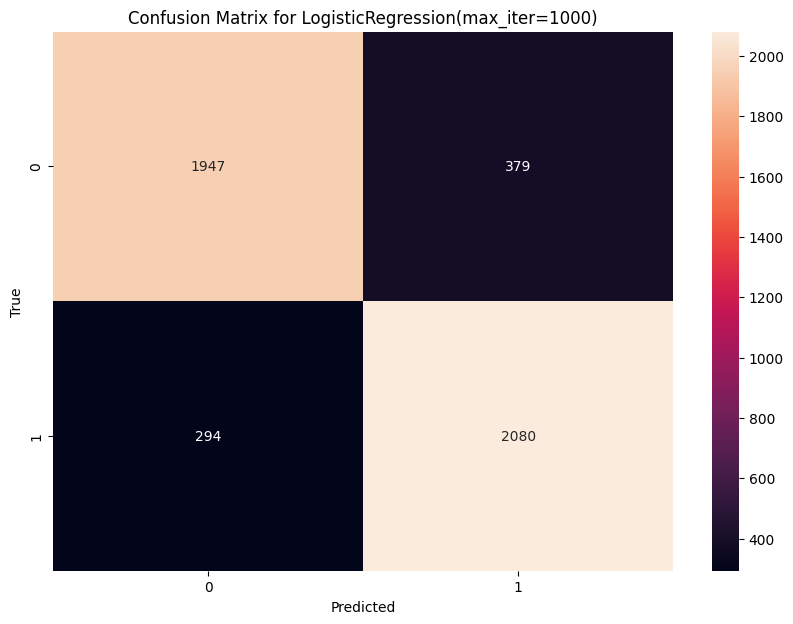

In [472]:
import seaborn as sns
import matplotlib.pyplot as plt  # For data visualization
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title(f'Confusion Matrix for {model}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Random Forest Evaluation

In [473]:
model2 = RandomForestClassifier()

In [474]:

pipeline2 = Pipeline([
    ('tfidf', vectorizer),
    ('classifier', model2)
])

# Fit the model
pipeline2.fit(x_train, y_train)

# Predict on the test set
y_pred2 = pipeline2.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)
class_report = classification_report(y_test, y_pred2, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

In [475]:
print(accuracy)

0.9170212765957447


In [476]:
print("Classification Report:")
print(class_report)
print("="*50)

Classification Report:
{'0': {'precision': 0.9230769230769231, 'recall': 0.9079965606190885, 'f1-score': 0.9154746423927178, 'support': 2326.0}, '1': {'precision': 0.9112769485903814, 'recall': 0.9258635214827295, 'f1-score': 0.9185123276222316, 'support': 2374.0}, 'accuracy': 0.9170212765957447, 'macro avg': {'precision': 0.9171769358336523, 'recall': 0.916930041050909, 'f1-score': 0.9169934850074747, 'support': 4700.0}, 'weighted avg': {'precision': 0.9171166806447849, 'recall': 0.9170212765957447, 'f1-score': 0.9170089965916254, 'support': 4700.0}}


## Naive Bayes Evaluation

In [477]:
model3=MultinomialNB()

In [478]:

pipeline3 = Pipeline([
    ('tfidf', vectorizer),
    ('classifier', model3)
])

# Fit the model
pipeline3.fit(x_train, y_train)

# Predict on the test set
y_pred3 = pipeline2.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred3)
class_report = classification_report(y_test, y_pred3, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

In [479]:
print(accuracy)

0.9170212765957447
